In [11]:
import numpy as np
from numpy import linalg as LA
from numpy.linalg import inv
from scipy import linalg
def makeA(lowerdiag,maindiag,upperdiag, length):
    main = np.ones(length)*maindiag
    upper = np.ones(length-1)*lowerdiag
    lower = np.ones(length-1)*upperdiag
    return np.diagflat(main) + np.diagflat(upper, 1) + np.diagflat(lower, -1)

condition number = 4133.6429268


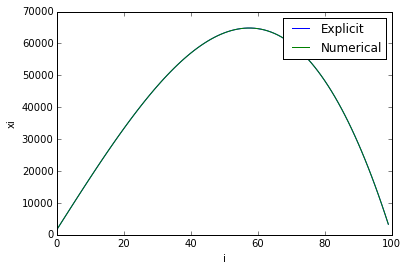

In [10]:
#Problem 1 solving a tridiagonal system of equations
x =np.linspace(0.0, 99.0, num=100)
maindiag = np.ones(100)*2
upperdiag = np.ones(99)*-1
lowerdiag = np.ones(99)*-1
A1 = makeA(-1,2,-1,100)
b1 = np.fromfunction(lambda i, j: i, (100, 1), dtype=int)
condition = LA.cond(A1)
explicit = np.dot(inv(A1), b1)
numerical = linalg.solve(A1,b1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, explicit, 'b')
plt.plot(x, numerical, 'g')
plt.legend(("Explicit", "Numerical"), loc="upper right")
plt.xlabel("i")
plt.ylabel("xi")
print "condition number = " + str(condition)

In [3]:
def jacobi(A,x,b,tol=0.000001,sc= 0.000001,iteration = 1000): 
    # A,x,b - matrices defining the problem
    # tol - absolute tolerance for convergence (default set to 10^-6)
    # sc - stopping criterion (relative error) for convergence (default set to 10^-6)
    # iteration - (optional) choose how many iterations to run
    # iteration will stop at the first condition that is satisfied whether it be 
    # absolute tolerance or stopping criterion. 
    # If you want to pick a specific criteria for convergence,set the others to -1
    xnew = np.copy(x)
    conv = np.ones(np.size(x))
    rel = np.ones(np.size(x))
    iterations = 0
    while np.amax(conv) > tol and np.amax(rel) > sc and iterations != iteration:
        xold = np.copy(xnew)
        iterations = iterations + 1
        for i in range(np.size(x)):
            firstsum = 0
            secondsum = 0
            for j in range(0, i):
                firstsum = firstsum + A[i][j]*xold[j]
            for j in range(i+1, np.size(x)):
                secondsum = secondsum + A[i][j]*xold[j]
            xnew[i] = 1.0/A[i][i]*(b[i] - firstsum - secondsum)
        for i in range(0, np.size(x)):
            conv[i] = abs(xnew[i] - xold[i])
            rel[i] = abs(xnew[i] - xold[i])/(xnew[i])
    return xnew, iterations

In [4]:
def Gausseidel(A,x,b,tol=0.000001,sc=0.000001,iteration = 1000):
    # A,x,b - matrices defining the problem
    # tol - absolute tolerance for convergence (default set to 10^-6)
    # sc - stopping criterion (relative error) for convergence (default set to 10^-6)
    # iteration - (optional) choose how many iterations to run
    # iteration will stop at the first condition that is satisfied whether it be 
    # absolute tolerance or stopping criterion. 
    # If you want to pick a specific criteria for convergence,set the others to -1
    xnew = np.copy(x)
    conv = np.ones(np.size(x))
    rel = np.ones(np.size(x))
    iterations = 0
    while np.amax(conv) > tol and np.amax(rel) > sc and iterations != iteration:
        xold = np.copy(xnew)
        iterations = iterations + 1
        for i in range(np.size(x)):
            firstsum = 0
            secondsum = 0
            for j in range(0, i):
                firstsum = firstsum + A[i][j]*xnew[j]
            for j in range(i+1, np.size(x)):
                secondsum = secondsum + A[i][j]*xold[j]
            xnew[i] = 1.0/A[i][i]*(b[i] - firstsum - secondsum)
        for i in range(0, np.size(x)):
            conv[i] = abs(xnew[i] - xold[i])
            rel[i] = abs(xnew[i] - xold[i])/(xnew[i])
    return xnew, iterations

In [5]:
def SOR(A,x,b,w,tol=0.000001,sc=0.000001,iteration = 1000):
    # A,x,b - matrices defining the problem
    # w - variable for SOR
    # tol - absolute tolerance for convergence (default set to 10^-6)
    # sc - stopping criterion (relative error) for convergence (default set to 10^-6)
    # iteration - (optional) choose how many iterations to run
    # iteration will stop at the first condition that is satisfied whether it be 
    # absolute tolerance or stopping criterion. 
    # If you want to pick a specific criteria for convergence,set the others to -1
    xnew = np.copy(x)
    conv = np.ones(np.size(x))
    rel = np.ones(np.size(x))
    iterations = 0
    while np.amax(conv) > tol and np.amax(rel) > sc and iterations != iteration:
        xold = np.copy(xnew)
        iterations = iterations + 1
        for i in range(np.size(x)):
            firstsum = 0
            secondsum = 0
            for j in range(0, i):
                firstsum = firstsum + A[i][j]*xnew[j]
            for j in range(i+1, np.size(x)):
                secondsum = secondsum + A[i][j]*xold[j]
            xnew[i] = (1-w)*xold[i] + 1.0*w/A[i][i]*(b[i] - firstsum - secondsum)
        for i in range(0, np.size(x)):
            conv[i] = abs(xnew[i] - xold[i])
            rel[i] = abs(xnew[i] - xold[i])/(xnew[i])
    return xnew, iterations

In [12]:
A = makeA(-1,4,-1,5)
b = np.ones(5)*100
x = np.zeros(5)
print str(A) + "* x = " + str(b) + "\n" 
print "Explicit Solution: " + str(np.dot(inv(A), b)) + "\n" 

#Problem 4, solving the equation using an absolute tolerance of 10^-6 and w = 1.1 for SOR
print "Jacobi: " + str(jacobi(A,x,b,sc = -1)[1]) + " iterations"
print jacobi(A,x,b,sc = -1)[0]
print "Gauss-Seidel: " + str(Gausseidel(A,x,b,sc = -1)[1]) + " iterations"
print Gausseidel(A,x,b,sc = -1)[0]
print "SOR: " + str(SOR(A,x,b,1.1, sc = -1)[1]) + " iterations"
print SOR(A,x,b,1.1, sc = -1)[0]
print "\n"

#Problem 5a, solving the equation using a stopping criterion of 10^-6 and 10^-8 ,w = 1.1 for SOR
print "Using stopping criterion of 10^-6"
print "Jacobi: " + str(jacobi(A,x,b,tol = -1)[1]) + " iterations"
print jacobi(A,x,b,tol = -1)[0]
print "Gauss-Seidel: " + str(Gausseidel(A,x,b,tol = -1)[1]) + " iterations"
print Gausseidel(A,x,b,tol = -1)[0]
print "SOR: " + str(SOR(A,x,b,1.1, tol = -1)[1]) + " iterations"
print SOR(A,x,b,1.1, tol = -1)[0]
print "\n"
print "Using stopping criterion of 10^-8"
print "Jacobi: " + str(jacobi(A,x,b,tol = -1, sc = 0.00000001)[1]) + " iterations"
print jacobi(A,x,b,tol = -1, sc = 0.00000001)[0]
print "Gauss-Seidel: " + str(Gausseidel(A,x,b,tol = -1, sc = 0.00000001)[1]) + " iterations"
print Gausseidel(A,x,b,tol = -1, sc = 0.00000001)[0] 
print "SOR: " + str(SOR(A,x,b,1.1, tol = -1, sc = 0.00000001)[1]) + " iterations"
print SOR(A,x,b,1.1, tol = -1, sc = 0.00000001)[0] 
print "\n"

[[ 4. -1.  0.  0.  0.]
 [-1.  4. -1.  0.  0.]
 [ 0. -1.  4. -1.  0.]
 [ 0.  0. -1.  4. -1.]
 [ 0.  0.  0. -1.  4.]]* x = [ 100.  100.  100.  100.  100.]

Explicit Solution: [ 36.53846154  46.15384615  48.07692308  46.15384615  36.53846154]

Jacobi: 22 iterations
[ 36.53846125  46.15384569  48.07692251  46.15384569  36.53846125]
Gauss-Seidel: 13 iterations
[ 36.53846142  46.15384606  48.07692303  46.15384614  36.53846153]
SOR: 10 iterations
[ 36.53846152  46.15384616  48.07692305  46.15384615  36.53846154]


Using stopping criterion of 10^-6
Jacobi: 18 iterations
[ 36.53845346  46.15383293  48.07690692  46.15383293  36.53845346]
Gauss-Seidel: 11 iterations
[ 36.53845816  46.15384362  48.07692181  46.15384568  36.53846142]
SOR: 8 iterations
[ 36.53846919  46.1538498   48.07692421  46.15384677  36.53846134]


Using stopping criterion of 10^-8
Jacobi: 23 iterations
[ 36.53846142  46.15384594  48.07692284  46.15384594  36.53846142]
Gauss-Seidel: 14 iterations
[ 36.53846152  46.15384614  48.

Optimal w value = 1.06


[0, 2, 0, 100]

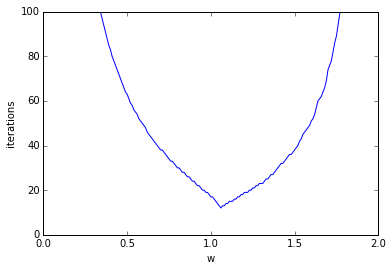

In [7]:
# Problem 5b, experiment to determine optimal w for SOR, will try mutliple w values (0,2) to find the fastest converging
#        SOR, which implies the optimal w. To get good resolution of the optimal w value, we will make the convergence very tight
#        AKA tol will be very low, to make the distribution larger. 
w = np.linspace(0.01, 1.9, num=190)
y = np.zeros(190)
for p in range(1,191,1):
    y[p-1] = SOR(A,x,b,p/100.0,tol = 0.000000001, sc = -1)[1]
print "Optimal w value = "  + str(w[np.argmin(y)])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(w, y, 'b')
plt.xlabel("w")
plt.ylabel("iterations")
plt.axis([0, 2, 0, 100])